In [1]:
!pip install kaggle

In [2]:
#Configuiring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Download CIFAR-10 dataset from Kaggle

!kaggle competitions download -c cifar-10

100% 715M/715M [00:07<00:00, 124MB/s]
100% 715M/715M [00:07<00:00, 106MB/s]


In [4]:
#Extracting the Dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 27.2 MB/s eta 0:00:00


In [6]:
import py7zr

archieve = py7zr.SevenZipFile('/content/train.7z', mode='r')
archieve.extractall()
archieve.close()

Importing the Dependencies

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
filenames = os.listdir('/content/train')

In [9]:
# Showing the first and last 5 images name in the train folder

print(filenames[:5])
print(filenames[-5:])

['15088.png', '39914.png', '26314.png', '3813.png', '26643.png']
['34691.png', '34845.png', '32126.png', '30118.png', '38881.png']


**Labels Processing**

In [10]:
labels_df = pd.read_csv('/content/trainLabels.csv')
labels_df.shape
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [11]:
# Checking the number of images for each class

labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [12]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [13]:
# Converting each class to a numerical value

labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}


# Handling missing values by assigning them a default value (-1 in this case)
labels = [labels_dictionary.get(i, -1) for i in labels_df['label']]

In [14]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


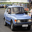

In [15]:
# Display the sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/26527.png')
cv2_imshow(img)

In [16]:
id_list = list(labels_df['id'])

In [17]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [18]:
# Convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  img_path = train_data_folder + str(id) + '.png'
  image = Image.open(img_path)
  image = np.array(image)
  data.append(image)

In [19]:
len(data)

50000

In [20]:
# Convert image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

**Train Test Split**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [22]:
# Check the shape of train and test images

print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [23]:
# Scaling the np array data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [24]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

**Building the Neural Network**

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 10

# Setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile the Neural Network

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [28]:
# Training the neural network

model.fit(X_train_scaled, Y_train, validation_split=0.1 , epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2075 - loss: 2.1500 - val_acc: 0.2685 - val_loss: 1.9557
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.2951 - loss: 1.9205 - val_acc: 0.2968 - val_loss: 1.8884
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3207 - loss: 1.8780 - val_acc: 0.3280 - val_loss: 1.8357
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3421 - loss: 1.8364 - val_acc: 0.3450 - val_loss: 1.8003
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3442 - loss: 1.8150 - val_acc: 0.3388 - val_loss: 1.8129
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3480 - loss: 1.8102 - val_acc: 0.3455 - val_loss: 1.8004
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3488 - loss: 1.8022 - val_acc: 0.3540 - val_loss: 1.7878
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3521 - loss: 1.7867 - val_acc: 0.3237 - val_loss: 1.8553
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [29]:
!pip install tensorflow

In [34]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [31]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [36]:
#Compile the updated model

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1 , epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 438s 328ms/step - acc: 0.3220 - loss: 2.0453 - val_acc: 0.7590 - val_loss: 0.8545
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 395s 321ms/step - acc: 0.6620 - loss: 1.0843 - val_acc: 0.8863 - val_loss: 0.4784
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 383s 322ms/step - acc: 0.7927 - loss: 0.7656 - val_acc: 0.9187 - val_loss: 0.3364
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 364s 324ms/step - acc: 0.8620 - loss: 0.5821 - val_acc: 0.9315 - val_loss: 0.2688
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 330ms/step - acc: 0.9048 - loss: 0.4448 - val_acc: 0.9345 - val_loss: 0.2502
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 330ms/step - acc: 0.9348 - loss: 0.3533 - val_acc: 0.9317 - val_loss: 0.2500
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 331ms/step - acc: 0.9516 - loss: 0.2866 - val_acc: 0.9220 - val_loss: 0.2747
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 330ms/step - acc: 0.9596 - loss: 0.2449 - val_acc: 0.9373 - val_loss: 0.2094
Epoch 9/

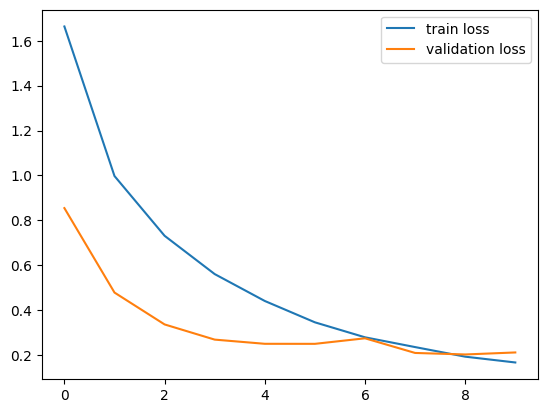

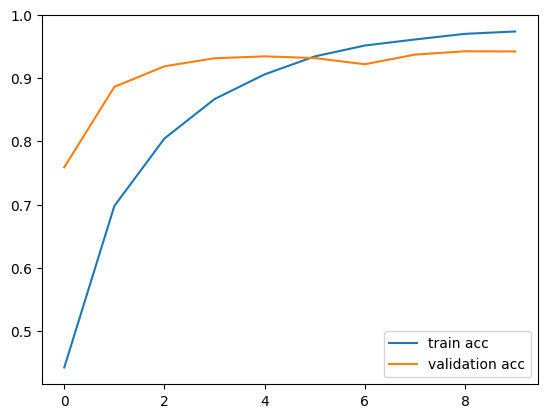

In [38]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train acc')
plt.plot(h.history['val_acc'], label='validation acc')
plt.legend()
plt.show()